# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
import json
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv(".../Monte_Carlo/example.env")

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_data = requests.get(btc_url).json()
btc_price = (float(json.dumps(btc_data["data"]["1"]["quotes"]["CAD"]["price"])))
print(f"BTC price in CAD is: ", btc_price)

# Fetch current ETH price
eth_data = requests.get(eth_url).json()
eth_price = (float(json.dumps(eth_data["data"]["1027"]["quotes"]["CAD"]["price"])))
print(f"ETH price in CAD is: ", eth_price)

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

BTC price in CAD is:  22734.619765
ETH price in CAD is:  1655.617535
The current value of your 1.2 BTC is $27281.54
The current value of your 5.3 ETH is $8774.77


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [8]:
# Format current date as ISO format
start_date = pd.Timestamp("2022-12-23", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-12-23", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_ticker = api.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Reorganize the DataFrame
# Separate ticker data
AGG = df_ticker[df_ticker['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_ticker[df_ticker['symbol']=='SPY'].drop('symbol', axis=1)

df_ticker = pd.concat([AGG, SPY], axis=1, keys=["AGG", "SPY"])

# Display sample data
df_ticker.head()

AGG                                             \
                            open   high     low  close   volume trade_count   
timestamp                                                                     
2022-12-23 05:00:00+00:00  98.05  98.11  97.895  97.97  4761697       17054   

                                         SPY                          \
                                vwap    open    high     low   close   
timestamp                                                              
2022-12-23 05:00:00+00:00  97.980418  379.65  383.06  378.03  382.91   

                                                             
                             volume trade_count        vwap  
timestamp                                                    
2022-12-23 05:00:00+00:00  58757557      441157  381.501493

In [9]:
# Pick AGG and SPY close prices
agg_close_price = float(df_ticker["AGG"]["close"])
spy_close_price = float(df_ticker["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $97.97
Current SPY closing price: $382.91


In [10]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price

# Print current value of shares
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")

The current value of your 200 AGG shares is $19594.00
The current value of your 50 SPY shares is $19145.50


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto = my_btc_value + my_eth_value
shares = my_agg_value + my_spy_value

# Create savings DataFrame
# initialize data of lists.
data = {'Amount': [round(crypto,2), round(shares, 2)]}
 
# Creates pandas DataFrame.
df_savings = pd.DataFrame(data, index=['crypto', 'shares'])

# Display savings DataFrame
display(df_savings)

,Amount
crypto,36056.32
shares,38739.50


<AxesSubplot:title={'center':'Savings Portfolio Composition'}, ylabel='Amount'>

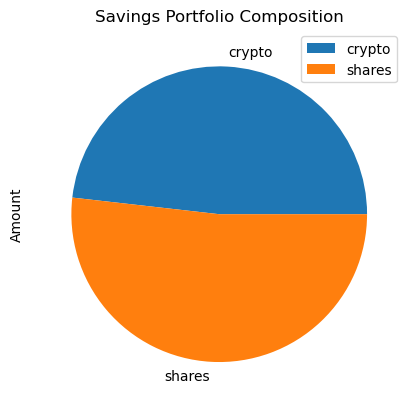

In [12]:
# Plot savings pie chart
df_savings.plot.pie(y="Amount", title="Savings Portfolio Composition")

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = round(crypto,2) + round(shares, 2)

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations! You have enough savings of: $", float(total_savings), "compare to  your goal of: $", float(emergency_fund))
elif total_savings == emergency_fund:
    print("Congratulations! You have reached you financial goal of three times monthly income.")
else:
    print("You are $", (emergency_fund - total_savings), "away from reaching your saving goal of three times monthly income.")

Congratulations! You have enough savings of: $ 74795.82 compare to  your goal of: $ 36000.0


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date_mc = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date_mc = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
df_ticker = api.get_bars(
    tickers,
    timeframe,
    start=start_date_mc,
    end=end_date_mc
).df

# Reorganize the DataFrame
# Separate ticker data
AGG_mc = df_ticker[df_ticker["symbol"]=="AGG"].drop("symbol", axis=1)
SPY_mc = df_ticker[df_ticker["symbol"]=="SPY"].drop("symbol", axis=1)


# Concatenate the ticker DataFrames
df_stock_data = pd.concat([AGG_mc, SPY_mc],axis=1, keys=['AGG','SPY'])

# Display sample data
df_stock_data.head()

AGG                                        \
                             open      high       low    close   volume   
timestamp                                                                 
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.605  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.810  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.860  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.140  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.970  2718710   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2016-05-02 04:00:00+00:00       15119  110.627199  206.92  208.18  206.41   
2016-05-03 04:00:00+00:00       15662  110.865995  206.52  206.80  205.28   
2016-05-04 04:00:00+00:00       13982  110.879063  204.99  205.85  204.42   
2016-05-05 04:00:00+00:00       15707  111.028363  205.56  205.98  204.47   
2016-05-06 04:00:00+00:00       12697  111.031967  204.08  205.77  203.88   

                                                                        
                              close     volume trade_count        vwap  
timestamp                                                               
2016-05-02 04:00:00+00:00  207.9700   61908515      263580  207.294812  
2016-05-03 04:00:00+00:00  206.1592  106422142      377518  206.312060  
2016-05-04 04:00:00+00:00  205.0100   92199810      345261  205.090172  
2016-05-05 04:00:00+00:00  204.9700   67597222      280622  205.141555  
2016-05-06 04:00:00+00:00  205.7200   89131004      340335  204.937074

In [16]:
# Configure and execute a Monte Carlo Simulation of 500 runs and 30 years for the 40/60 portfolio.
MC_40_60_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4,.6],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [17]:
# Printing the simulation input data
MC_40_60_dist.portfolio_data.head()

AGG                                        \
                             open      high       low    close   volume   
timestamp                                                                 
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.605  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.810  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.860  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.140  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.970  2718710   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00       15119  110.627199          NaN  206.92   
2016-05-03 04:00:00+00:00       15662  110.865995     0.001853  206.52   
2016-05-04 04:00:00+00:00       13982  110.879063     0.000451  204.99   
2016-05-05 04:00:00+00:00       15707  111.028363     0.002526  205.56   
2016-05-06 04:00:00+00:00       12697  111.031967    -0.001530  204.08   

                                                                            \
                             high     low     close     volume trade_count   
timestamp                                                                    
2016-05-02 04:00:00+00:00  208.18  206.41  207.9700   61908515      263580   
2016-05-03 04:00:00+00:00  206.80  205.28  206.1592  106422142      377518   
2016-05-04 04:00:00+00:00  205.85  204.42  205.0100   92199810      345261   
2016-05-05 04:00:00+00:00  205.98  204.47  204.9700   67597222      280622   
2016-05-06 04:00:00+00:00  205.77  203.88  205.7200   89131004      340335   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  207.294812          NaN  
2016-05-03 04:00:00+00:00  206.312060    -0.008707  
2016-05-04 04:00:00+00:00  205.090172    -0.005574  
2016-05-05 04:00:00+00:00  205.141555    -0.000195  
2016-05-06 04:00:00+00:00  204.937074     0.003659

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_40_60_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/kiransohi/Documents/Github/Monte_Carlo/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002554,1.009028,1.001264,0.999732,1.001531,1.000773,1.000712,0.998439,1.007204,1.004317,...,0.997303,1.012563,0.994988,0.997083,0.997665,1.001918,1.002148,1.000222,0.998272,0.996052
2,1.002532,1.001055,0.995683,0.996243,0.987563,0.993359,0.997553,0.994564,1.011350,1.014294,...,1.007299,1.006390,0.987971,0.999618,0.996987,0.995212,0.996272,0.992171,0.989447,0.994885
3,1.002054,0.994190,0.992429,1.007379,0.981894,1.005921,1.000504,0.991769,1.016565,1.016757,...,1.005208,0.992429,0.987455,1.002141,1.002831,0.984162,0.990226,0.997120,0.983114,1.000769
4,0.997251,0.994084,0.984665,1.015494,0.979484,0.997092,1.001048,0.994223,1.025196,1.025737,...,1.002363,0.994174,0.983714,1.009260,0.995973,0.992065,0.999247,1.005198,0.973861,1.012536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,17.228751,27.535937,12.714602,16.986601,6.755140,43.997812,11.526949,7.393202,14.966688,8.163557,...,12.936541,18.800570,15.539236,9.926007,7.978324,15.534190,27.404753,8.454094,26.283817,13.392068
7557,17.128529,27.760168,12.846635,17.000367,6.829078,44.075493,11.672190,7.371350,14.954543,8.044110,...,12.962468,19.047879,15.693051,9.922048,7.979600,15.426412,27.799856,8.470315,26.650695,13.278999
7558,17.151574,27.543640,12.917856,16.866535,6.737181,43.809010,11.642664,7.340695,15.107633,8.084623,...,12.871432,18.971930,15.586837,9.990334,8.010235,15.394287,27.871593,8.488153,26.626216,13.345506
7559,17.192625,27.970658,12.815865,17.073367,6.764769,44.143639,11.689133,7.316756,15.119375,8.021424,...,12.943511,18.941423,15.581431,9.994325,8.021158,15.338517,27.852261,8.546297,26.827035,13.429758


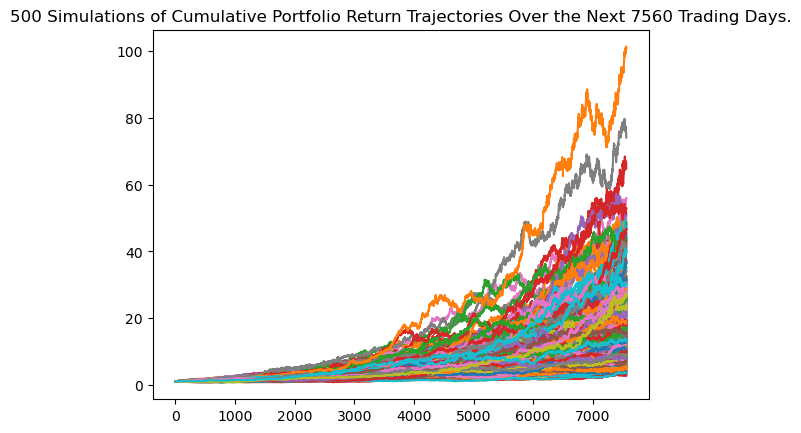

In [19]:
# Plot simulation outcomes
line_plot = MC_40_60_dist.plot_simulation()

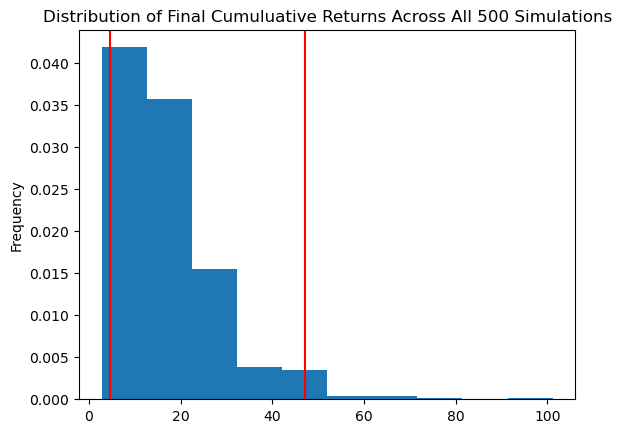

In [20]:
# Plot probability distribution and confidence intervals
dist_plot = MC_40_60_dist.plot_distribution()

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_40_60_tbl = MC_40_60_dist.summarize_cumulative_return()

# Print summary statistics
print(MC_40_60_tbl)

count           500.000000
mean             17.410975
std              11.578226
min               2.775957
25%               9.593442
50%              14.766888
75%              21.803326
max             101.132045
95% CI Lower      4.611506
95% CI Upper     47.047794
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(MC_40_60_tbl[8]*20000,2)
ci_upper = round(MC_40_60_tbl[9]*20000,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $92230.12 and $940955.88


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(MC_40_60_tbl[8]*30000,2)
ci_upper = round(MC_40_60_tbl[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $138345.18 and $1411433.82


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_40_60_dist_5y = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4,.6],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_40_60_dist_5y.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/kiransohi/Documents/Github/Monte_Carlo/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001995,1.006959,1.004892,1.012078,1.014637,0.999396,0.989337,0.995876,1.004104,0.997771,...,1.004123,1.000615,1.001346,1.004126,1.006536,1.005068,1.000541,1.006840,1.002718,1.000813
2,0.993387,1.007555,1.008571,1.014137,1.025731,0.997257,0.988046,0.999581,1.013253,0.988742,...,0.993415,1.010053,1.005088,1.002248,1.015899,1.005556,0.999654,1.003813,0.999820,1.007419
3,0.991265,1.007748,1.011116,1.021341,1.028190,1.010282,0.983588,0.997799,1.009342,0.988592,...,0.997452,1.006640,1.009404,1.006543,1.019747,0.999033,0.992003,1.012941,0.994562,1.024464
4,0.992680,1.007507,1.018455,1.010873,1.025841,1.011940,0.979902,0.991841,1.011093,0.978791,...,1.004757,1.005392,1.012950,0.992569,1.013437,0.996898,0.989546,1.006534,0.997086,1.028286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.404715,1.830003,1.614922,3.123811,1.985730,1.008496,1.409721,1.531093,1.414098,1.372056,...,0.984006,1.069718,1.501409,1.352073,1.082180,1.556524,1.406122,1.586965,1.061819,2.104385
1257,2.397982,1.838710,1.613740,3.121447,1.986042,1.003342,1.400705,1.540893,1.401420,1.364014,...,0.986027,1.071553,1.497534,1.361226,1.064629,1.548060,1.428215,1.603775,1.063995,2.096300
1258,2.375545,1.838054,1.609266,3.161568,1.992451,1.009338,1.397012,1.531318,1.403616,1.376392,...,0.993301,1.074652,1.495501,1.373825,1.055579,1.541463,1.413489,1.591257,1.059248,2.121143
1259,2.371570,1.841218,1.615732,3.148511,2.010723,1.016747,1.397282,1.534129,1.396918,1.367926,...,0.994308,1.068572,1.509135,1.394175,1.070416,1.534497,1.431841,1.595129,1.055621,2.113966


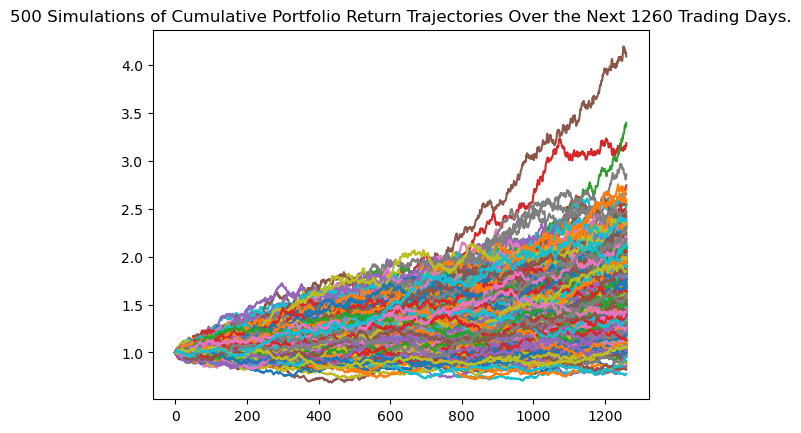

In [26]:
# Plot simulation outcomes
line_plot = MC_40_60_dist_5y.plot_simulation()

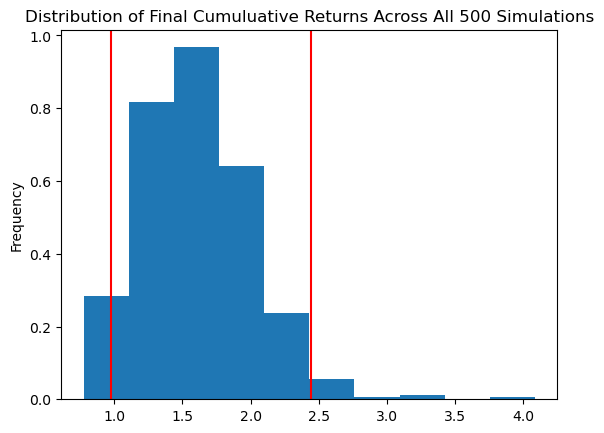

In [27]:
# Plot probability distribution and confidence intervals
dist_plot = MC_40_60_dist_5y.plot_distribution()

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_40_60_tbl_5y = MC_40_60_dist_5y.summarize_cumulative_return()

# Print summary statistics
print(MC_40_60_tbl_5y)

count           500.000000
mean              1.615043
std               0.408016
min               0.777612
25%               1.321865
50%               1.573504
75%               1.845878
max               4.085326
95% CI Lower      0.977856
95% CI Upper      2.442879
Name: 1260, dtype: float64


In [29]:
# Set initial investment
initial_investment = 20000*3

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(MC_40_60_tbl_5y[8]*60000,2)
ci_upper_five = round(MC_40_60_tbl_5y[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $58671.33 and $146572.76


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_40_60_dist_10y = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4,.6],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_40_60_dist_10y.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/kiransohi/Documents/Github/Monte_Carlo/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.986589,1.002952,0.996240,0.998998,1.011393,0.995427,1.006697,1.002922,1.000507,0.996067,...,1.005128,0.997774,1.008855,0.995094,0.992713,1.010293,1.008499,1.000450,0.997473,1.009197
2,0.992567,0.992679,0.997539,0.994174,1.012072,0.984229,1.003679,1.002798,1.007000,0.991513,...,1.007039,1.003815,1.001892,0.993839,0.992280,1.007301,1.017282,0.993480,1.004671,1.000067
3,0.996119,0.998025,1.000496,0.993786,1.007562,0.981227,1.018346,0.997663,1.002035,0.991555,...,1.003671,0.997693,0.999835,0.991810,0.992556,1.014576,1.017104,1.003080,1.009488,0.993150
4,1.001313,0.995221,1.008407,0.986928,1.014576,0.979832,1.026485,1.001986,1.000839,0.992205,...,0.992600,0.991071,1.003257,0.994420,0.989464,1.023274,1.024493,1.005453,1.004421,0.992473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.554421,1.604649,1.154500,1.618921,3.319807,3.679438,2.105104,2.414552,1.533575,2.188374,...,1.422986,3.387879,2.294254,2.082293,1.799222,2.401052,3.225919,2.344049,1.515001,3.311250
2517,1.559477,1.610302,1.147242,1.629097,3.354140,3.710663,2.102203,2.427263,1.528446,2.185865,...,1.433632,3.422723,2.312043,2.086843,1.795086,2.389734,3.220352,2.344396,1.509100,3.320793
2518,1.577091,1.629008,1.140403,1.636689,3.349875,3.708308,2.089558,2.430267,1.517889,2.188121,...,1.446481,3.436706,2.300929,2.092237,1.799307,2.407732,3.205986,2.335970,1.499071,3.330412
2519,1.563371,1.622984,1.136068,1.645573,3.373732,3.705722,2.095292,2.420304,1.509349,2.185489,...,1.449454,3.461419,2.285104,2.081379,1.805609,2.416466,3.190486,2.340710,1.499426,3.321367


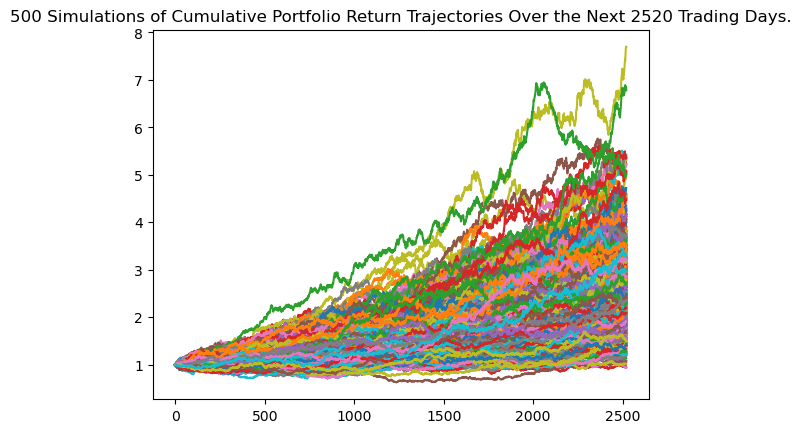

In [32]:
# Plot simulation outcomes
line_plot = MC_40_60_dist_10y.plot_simulation()

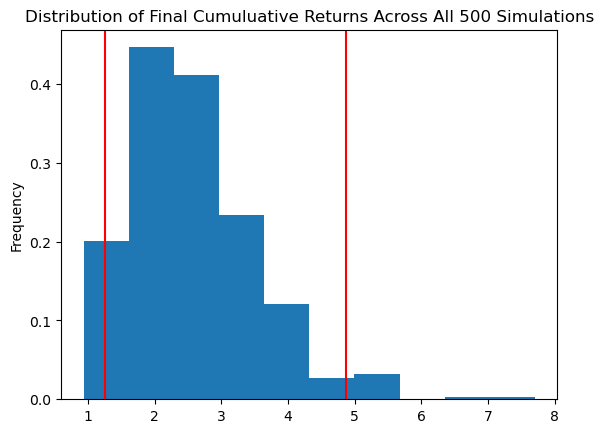

In [33]:
# Plot probability distribution and confidence intervals
dist_plot = MC_40_60_dist_10y.plot_distribution()

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_40_60_tbl_10y = MC_40_60_dist_10y.summarize_cumulative_return()

# Print summary statistics
print(MC_40_60_tbl_10y)

count           500.000000
mean              2.584862
std               0.940079
min               0.939845
25%               1.904097
50%               2.425324
75%               3.079090
max               7.699857
95% CI Lower      1.249113
95% CI Upper      4.870578
Name: 2520, dtype: float64


In [35]:
# Set initial investment
initial_investment = 20000*3

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(MC_40_60_tbl_10y[8]*60000,2)
ci_upper_ten = round(MC_40_60_tbl_10y[9]*60000,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $74946.75 and $292234.7


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following:
* Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset—that is, stock—to help accumulate wealth for retirement.
* Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks.
* Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

In [36]:
# Configure MC Simulation as follows:
# Forecast the cumulative returns for 10 years from now
# Run the simulation over 500 samples, and use the same data that the API 
# call to Alpaca generated.
# Adjust the weights of the retirement portfolio so that the composition for the 
# Monte Carlo simulation consists of 20% bonds and 80% stocks

MC_20_80_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.2,.8],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [37]:
# Running a Monte Carlo simulation to forecast
MC_20_80_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/kiransohi/Documents/Github/Monte_Carlo/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002541,0.992919,0.995643,0.991264,1.003730,1.013722,0.991145,1.004507,1.017541,0.998724,...,0.993018,1.009979,1.012411,0.987657,1.008382,1.008083,0.999465,0.997133,1.012780,1.018714
2,1.012962,0.999725,0.997092,0.998416,1.013343,1.021738,0.999809,1.013607,1.019768,1.005664,...,0.998956,1.006681,1.009643,0.979256,1.002379,1.009032,1.007609,1.011633,1.011123,1.018836
3,1.017902,0.999005,1.011315,0.998759,1.014958,1.017724,0.996030,1.015409,1.027003,0.998460,...,1.001811,1.019665,1.015198,0.974030,0.984314,1.014322,1.002839,1.004900,0.992970,1.038252
4,1.024592,0.999523,0.990337,1.011897,1.019273,1.020781,0.994098,1.026095,1.030835,1.006921,...,1.004795,1.024611,0.992979,0.964976,0.983391,1.013419,1.010307,0.997424,0.993750,1.045019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.182766,2.181767,2.153706,2.993953,3.954046,2.846385,2.492655,1.399181,1.506849,2.300896,...,4.172641,1.842892,4.205425,6.746301,2.599358,3.694899,2.747568,1.383309,3.871378,3.023288
2517,3.219753,2.154596,2.152300,2.972497,3.978091,2.833828,2.542430,1.397172,1.521145,2.277023,...,4.178899,1.842506,4.241858,6.731998,2.572008,3.626855,2.759481,1.365042,3.879942,3.046972
2518,3.218326,2.141705,2.175494,3.004118,4.041415,2.855814,2.556100,1.397757,1.512949,2.279897,...,4.162523,1.830371,4.276671,6.727383,2.555765,3.660471,2.765931,1.349148,3.855623,3.053199
2519,3.166987,2.111463,2.176784,3.009784,4.006160,2.850499,2.580024,1.374711,1.513262,2.266777,...,4.149794,1.825323,4.211643,6.785815,2.562610,3.663151,2.772144,1.337041,3.926014,3.057049


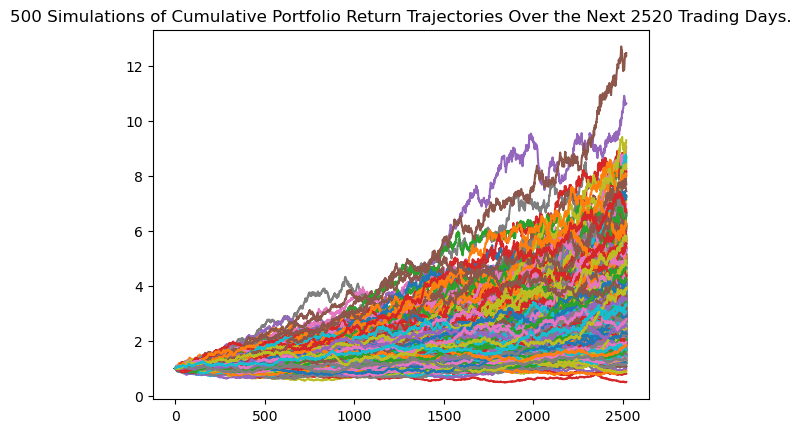

In [38]:
# Plot simulation outcomes
line_plot = MC_20_80_dist.plot_simulation()

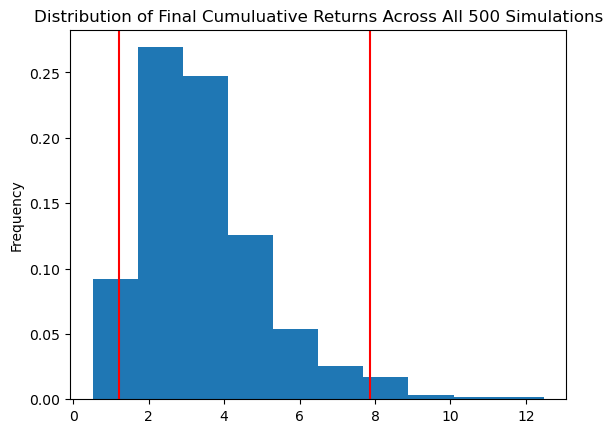

In [39]:
# Plot probability distribution and confidence intervals
dist_plot = MC_20_80_dist.plot_distribution()

In [40]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_20_80_tbl = MC_20_80_dist.summarize_cumulative_return()

# Print summary statistics
print(MC_20_80_tbl)

count           500.000000
mean              3.433321
std               1.659359
min               0.514221
25%               2.249847
50%               3.145672
75%               4.198803
max              12.473628
95% CI Lower      1.217231
95% CI Upper      7.859833
Name: 2520, dtype: float64


* Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [41]:
# Set initial investment
initial_investment = 20000*3

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower = round(MC_20_80_tbl[8]*60000,2)
ci_upper = round(MC_20_80_tbl[9]*60000,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $73033.83 and $471589.95



* Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?

#### Answer:

* For 20% Bond vs. 80% Stock with forecast of 10 years horizon with simulation over 500 samples, there is a 95% chance that an initial investment of 60,000 in the portfolio over the next 10 years will end within the range of 73,033.83 and 471,589.95.

compared to

* For 40% Bonds vs. 60% Stock with forecast of 10 years horizon with simulation over 500 samples, there is a 95% chance that an initial investment of 60K in the portfolio over the next 10 years will end within in the range of 74,946.75 and 292,234.70.

The 80% Stocks vs. 20% Bonds portfolio seems to yield higher Upper Confidence Interval when compared to the 60% Stocks vs. 40% Bonds porfolio but the Lower Confidence Inteval indicates little change.   

The decision to retire is very much dependent on the union members goals for retirement.  There is no gaurantee that the portfolio will reach ~$471K on the Upper CI in actuality within 10 years as indicated by the stock heavy portfolio MC simulation.  The decision to retire remains with the member themselves and this simulation should not be used as a final indicator for retirement decision. 